In [2]:
import numpy as np
import scipy.stats as spst
import matplotlib.pyplot as plt

plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm", "font.size": 9})

## Problema 1

La media de una distribución uniforme $U(m, a)$ es $m$, y su varianza es

$$\sigma^2 = ⟨U^2⟩ - ⟨U⟩^2 = \frac{1}{a} \int_{m-a/2}^{m+a/2} U^2dU - m^2 = \frac{a^2}{12} + m^2 - m^2 = \frac{a^2}{12}.$$

Así, al estar tratando con variables independientes, el promedio y varianza de $Z_n$ son $μ_n = n m$, $\sigma^2_n = n \frac{a^2}{12}$. Con lo que la distribución normal que aproxima a $Z_n$ según el límite central también debe de tener estos parámeros (i.e., $ \mathcal{N}(μ = n m, \sigma^2 = n \frac{a^2}{2})$).

In [26]:
def Zn(m, a, n=100):
    sum = 0
    for _ in range(n):
        sum += np.random.uniform(m - a/2, m + a/2)
    return sum

In [27]:
m = 2 # Media
a = 3 # Ancho
n = 100 # Número de sumandos
N = 10**3 # Número de sumas

Zns = np.zeros(N)
for i in range(N):
    Zns[i] = Zn(m, a, n)

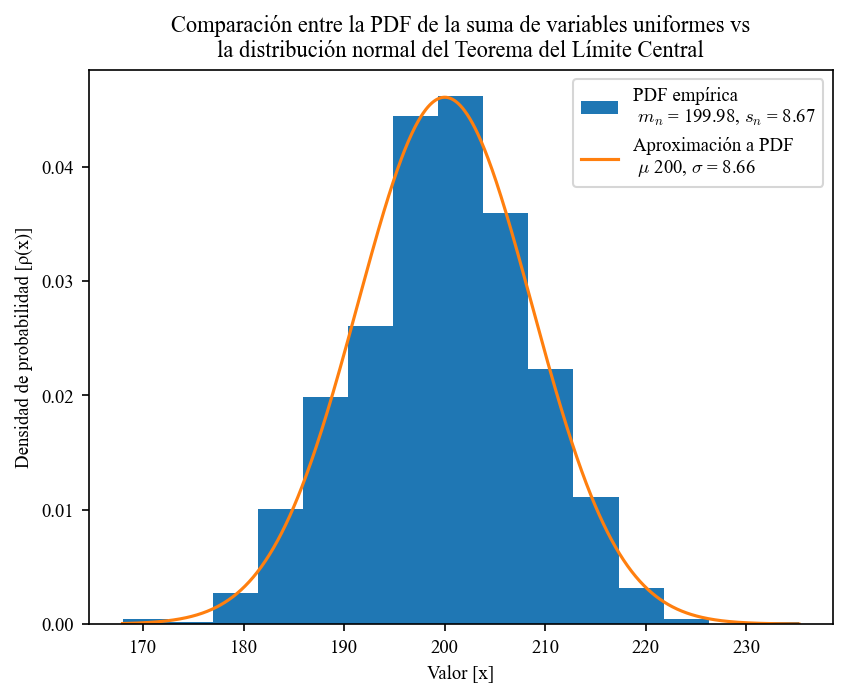

In [35]:
x = np.linspace(Zns.min(), Zns.max(), 1000)
mu = n*m
sigma2 = n*a**2/12
pdf_analytic = spst.norm(loc=mu, scale=np.sqrt(sigma2))

fig, ax = plt.subplots(dpi=150)
ax.set(xlabel="Valor [x]", ylabel="Densidad de probabilidad [ρ(x)]",
    title="Comparación entre la PDF de la suma de variables uniformes vs\nla distribución normal del Teorema del Límite Central")
ax.hist(Zns, bins=15, density=True, label=f"PDF empírica\n $m_n$ = {Zns.mean():.2f}, $s_n$ = {Zns.std():.2f}")
ax.plot(x, pdf_analytic.pdf(x), label=f"Aproximación a PDF\n $\mu$ {mu}, $\sigma$ = {np.sqrt(sigma2):.2f}")

ax.legend()
plt.savefig("Figures/problema1.png")
plt.show()

## Problema 2

Para $X_1 \sim \mathcal{N}_1(μ_1, σ^2_1)$, $X_2 \sim \mathcal{N}_2(μ_2, σ^2_2)$, el Teorema de la Suma de Varialbes Aleatorias Normales Independientes predice

$$Y = X_1 + X_2 \sim \mathcal{N}(μ_1 + μ_2, σ^2_1 + σ^2_2).$$

Siendo en este caso $μ_1 = 0$, $σ^2_1 = 2$, $μ_2 = -1$, $σ^2_2 = 1$ y por tanto $Y \sim \mathcal{N}(-1, 3)$.

In [3]:
μ1, σ1 = 0, np.sqrt(2)
μ2, σ2 = -1, np.sqrt(1)
N = 10**4

Ys = np.zeros(N)
for i in range(N):
    X1 = np.random.normal(μ1, σ1)
    X2 = np.random.normal(μ2, σ2)
    Ys[i] = X1 + X2

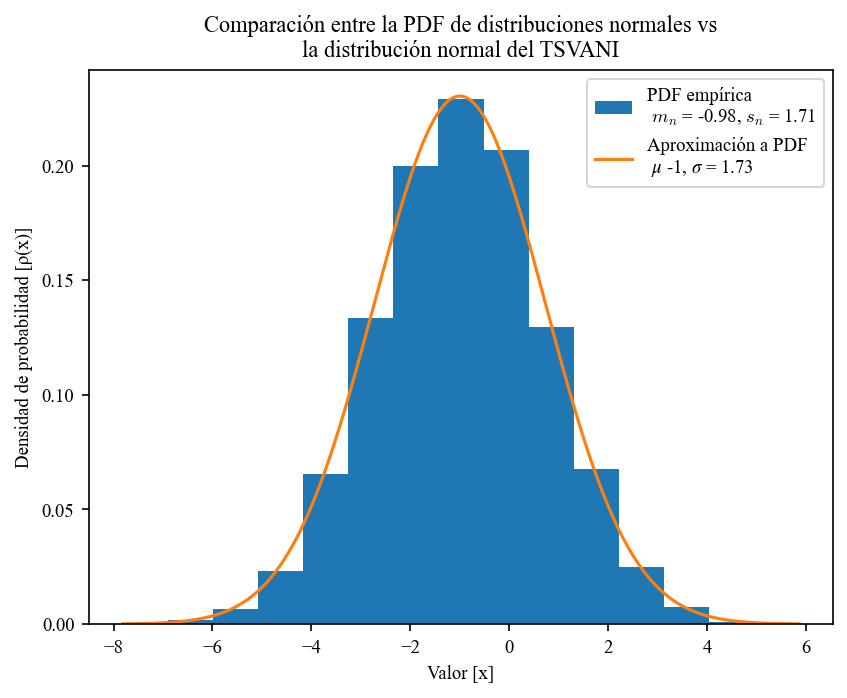

In [4]:
x = np.linspace(Ys.min(), Ys.max(), 1000)
μ = μ1 + μ2
σ = np.sqrt(σ1**2 + σ2**2)
pdf_analytic = spst.norm(loc=μ, scale=σ)

fig, ax = plt.subplots(dpi=150)
ax.set(xlabel="Valor [x]", ylabel="Densidad de probabilidad [ρ(x)]",
    title="Comparación entre la PDF de distribuciones normales vs\nla distribución normal del TSVANI")
ax.hist(Ys, bins=15, density=True, label=f"PDF empírica\n $m_n$ = {Ys.mean():.2f}, $s_n$ = {Ys.std():.2f}")
ax.plot(x, pdf_analytic.pdf(x), label=f"Aproximación a PDF\n $μ$ {μ}, $σ$ = {σ:.2f}")

ax.legend()
plt.savefig("Figures/problema2.png")
plt.show()

## Problema 3

Para $X \sim \mathcal{N}(μ, σ^2)$ y $Y = \alpha X + \beta$, el Teorema de la Transformación Lineal de Variables Aleatorias Normales predice

$$ Y \sim N(α μ + β, α^2 σ^2).$$

Siendo en este caso $μ = 0$, $σ^2 = 1$, $α = 4$, $β = 6$, con lo que $Y \sim N(6, 16)$.

In [31]:
μ0, σ0 = 0, np.sqrt(1)
N = 10**6

α = 4
β = 6
Ys = np.zeros(N)
for i in range(N):
    X = np.random.normal(μ0, σ0)
    Ys[i] = α * X + β

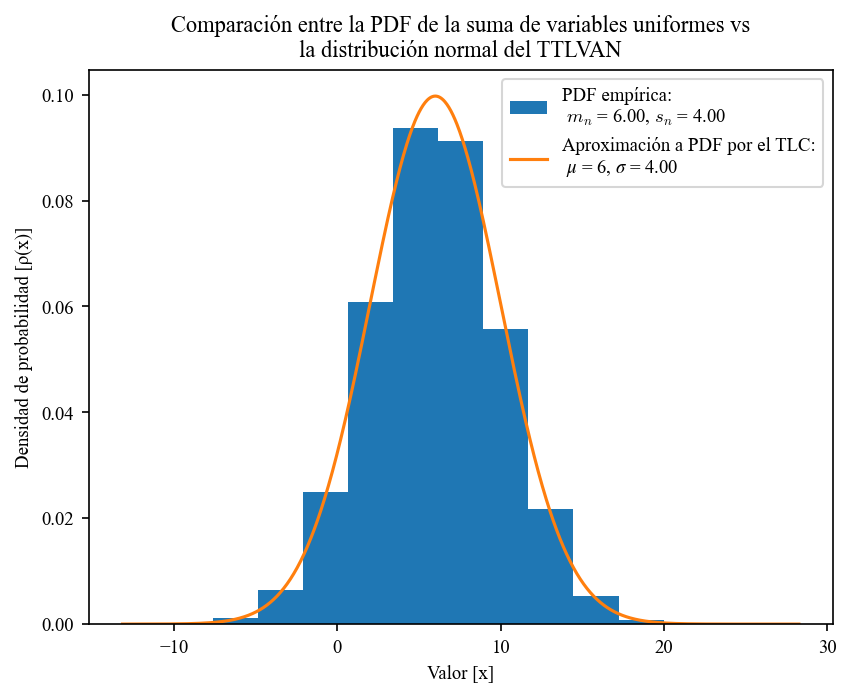

In [32]:
x = np.linspace(Ys.min(), Ys.max(), 1000)
μ = α * μ0 + β
σ2 = α**2 * σ0**2
pdf_analytic = spst.norm(loc=μ, scale=np.sqrt(σ2))

fig, ax = plt.subplots(dpi=150)
ax.set(xlabel="Valor [x]", ylabel="Densidad de probabilidad [ρ(x)]",
    title="Comparación entre la PDF de la suma de variables uniformes vs\nla distribución normal del TTLVAN")
ax.hist(Ys, bins=15, density=True, label=f"PDF empírica:\n $m_n$ = {Ys.mean():.2f}, $s_n$ = {Ys.std():.2f}")
ax.plot(x, pdf_analytic.pdf(x), label=f"Aproximación a PDF por el TLC:\n $μ$ = {μ}, $σ$ = {np.sqrt(σ2):.2f}")

ax.legend()
plt.savefig("Figures/problema3.png")
plt.show()